# EDA of the Query->Document_type classification dataset

In [69]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

## Load original dataset

In [70]:
filepath = '/raid/antoloui/Master-thesis/Data/Classification/cam_query_to_doctype.csv'
original_df = pd.read_csv(filepath, delimiter=',', index_col=0)

# Rename columns.
original_df.columns = ['Query', 'Class']
classes = original_df.Class.unique()

# Print details.
print('Number of queries: {}\n'.format(original_df.shape[0]))
print('Number of doc types: {:,}'.format(len(classes)))
for i, cat in enumerate(classes):
    print("  {}".format(cat))
original_df.sample(10)

Number of queries: 55900

Number of doc types: 20
  Install & Upgrade Guides
  Configuration (Guides, Examples & TechNotes)
  Data Sheets
  Release Notes
  Maintain & Operate (Guides & TechNotes)
  End User Guides
  White Papers
  Q&A
  Technical References
  Design (Guides & TechNotes)
  Sales Resources
  Command References
  Compatibility Information
  Main Pages
  Product Literature
  Troubleshooting (Guides & TechNotes)
  Programming Guides
  Feature Guides
  License & Warranty
  End-of-Life & End-of-Sale Notices


,Query,Class
51900,umbrella IP Layer Enforcement,"Configuration (Guides, Examples & TechNotes)"
3161,2960X ip route config,"Configuration (Guides, Examples & TechNotes)"
38408,ipv6 on 2960-x switch sdm,Q&A
20593,Catalyst 9300 Series Switches: IP Multicast Op...,"Configuration (Guides, Examples & TechNotes)"
29726,Data Center UCS - Refresh To The Future,Data Sheets
15766,Catalyst 3850 Switches: Configuring IPv4 ACLs:...,"Configuration (Guides, Examples & TechNotes)"
9632,asr 903 ordering guide,Install & Upgrade Guides
5140,3850 storm control impact,"Configuration (Guides, Examples & TechNotes)"
20014,Catalyst 9300 \tOnline Diagnostics,"Configuration (Guides, Examples & TechNotes)"
7830,AP 3802 STP,"Configuration (Guides, Examples & TechNotes)"


### Only keep the classes of interest

In [71]:
classes_interest = ['Command References',
                    'Data Sheets',
                    'Configuration (Guides, Examples & TechNotes)',
                    'Install & Upgrade Guides',
                    'Release Notes',
                    'Maintain & Operate (Guides & TechNotes)',
                    'End User Guides']
original_df = original_df[original_df.Class.isin(classes_interest)]
original_df = original_df.dropna()

# Add classes ids column.
#original_df['Class_id'] = original_df.apply(lambda row: np.where(np.asarray(classes_interest) == row.Class)[0][0], axis=1)

# Print details.
print('Number of training queries: {}\n'.format(original_df.shape[0]))
print('Number of remaining doc types: {:,}'.format(len(original_df.Class.unique())))
for i, cat in enumerate(original_df.Class.unique()):
    print("  {}".format(cat))
original_df.sample(10)

Number of training queries: 53796

Number of remaining doc types: 7
  Install & Upgrade Guides
  Configuration (Guides, Examples & TechNotes)
  Data Sheets
  Release Notes
  Maintain & Operate (Guides & TechNotes)
  End User Guides
  Command References


,Query,Class
12337,c220 M4 IMC password,Install & Upgrade Guides
5568,5000 Series Wireless Controllers: Access Contr...,"Configuration (Guides, Examples & TechNotes)"
713,cisco 9500 dhcp,"Configuration (Guides, Examples & TechNotes)"
8118,AnyConnect VPN Client Connections: Configure A...,"Configuration (Guides, Examples & TechNotes)"
25580,Cisco TrustSec SGACL policy enforcement on the...,"Configuration (Guides, Examples & TechNotes)"
7517,ASR 9000 Series: 24-Port and 48-Port Dual-Rate...,Data Sheets
40169,Outbound Mail Delivery,End User Guides
22556,Catalyst 9400 Series Switches: Troubleshooting...,Install & Upgrade Guides
25925,Cisco Stealthwatch Enterprise: Flow Rate License?,Data Sheets
35661,ios 3850 48p,"Configuration (Guides, Examples & TechNotes)"


### Plot document type repartition

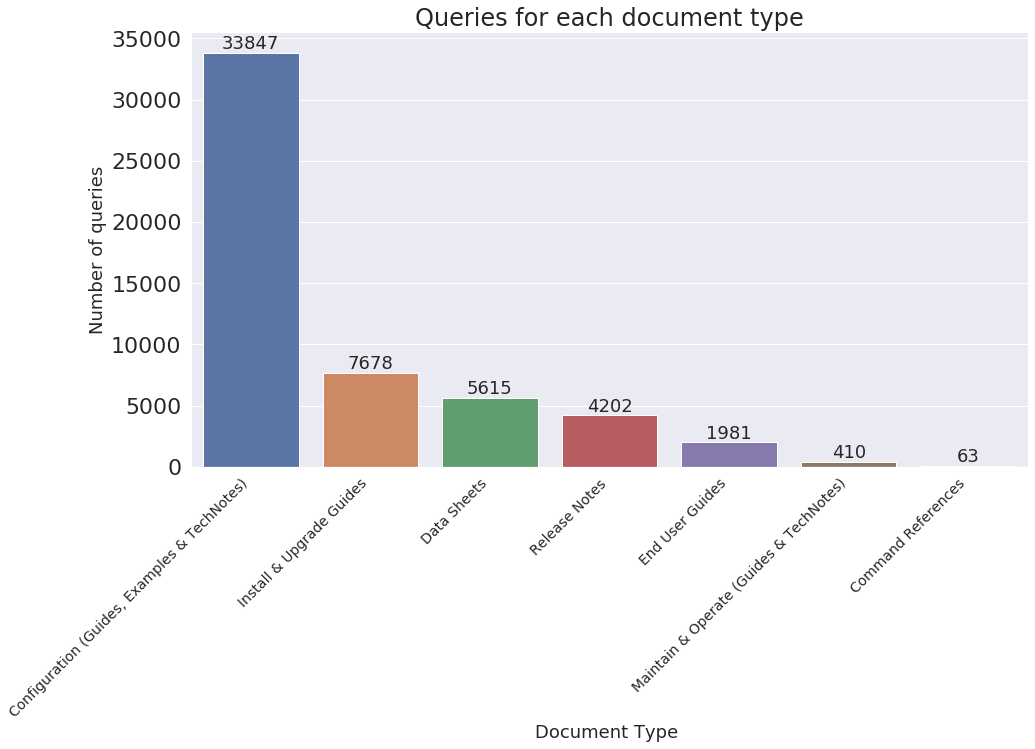

In [74]:
def plot_repartition(df):
    """
    """
    # Get the counts of each document type.
    count = df['Class'].value_counts()
    count_classes = count.index.tolist()
    count_values = count.values.tolist()

    # Create barplot.
    sns.set(font_scale = 2)
    plt.figure(figsize=(15,8))
    ax = sns.barplot(count_classes, count_values)

    # Rotate labels on x-axis.
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

    # Set titles of plot and axes.
    plt.title("Queries for each document type", fontsize=24)
    plt.ylabel('Number of queries', fontsize=18)
    plt.xlabel('Document Type ', fontsize=18)

    #adding the count labels above rectangles.
    rects = ax.patches
    for rect, label in zip(rects, count_values):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

    # Show the plot.
    plt.show()
    return

plot_repartition(original_df)

## Load synthetic dataset

Number of training queries: 52757

Number of doc types: 6
  Configuration (Guides, Examples & TechNotes)
  Install & Upgrade Guides
  Maintain & Operate (Guides & TechNotes)
  Release Notes
  Data Sheets
  End User Guides


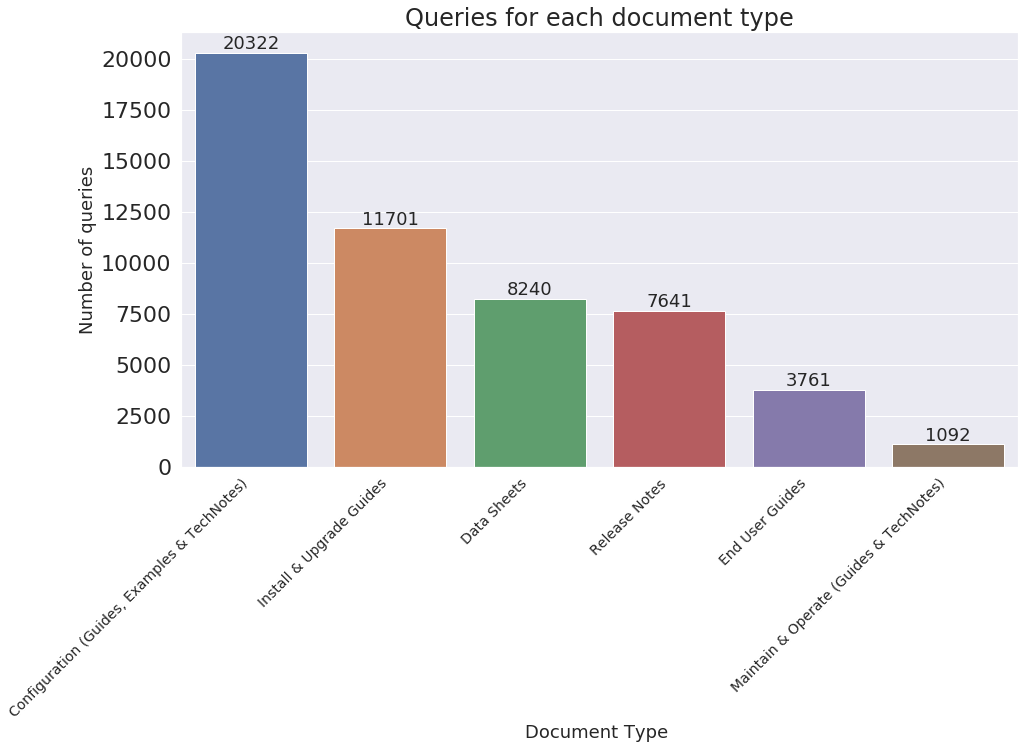

In [75]:
# Load file.
filepath = '/raid/antoloui/Master-thesis/Data/Classification/synthetic_query_doctype_dataset.pkl'
with open(filepath, 'rb') as f:
    data = pickle.load(f)
    
# Create dataframe.
new_df = pd.DataFrame(data, columns =['Query', 'Class'])
new_df = new_df.dropna()

# Print details.
print('Number of training queries: {}\n'.format(new_df.shape[0]))
print('Number of doc types: {:,}'.format(len(new_df.Class.unique())))
for i, cat in enumerate(new_df.Class.unique()):
    print("  {}".format(cat))
new_df.sample(10)

# Plot repartition.
plot_repartition(new_df)

### Concat datasets

Number of training queries: 106553

Number of doc types: 7
  Install & Upgrade Guides
  Configuration (Guides, Examples & TechNotes)
  Data Sheets
  Release Notes
  Maintain & Operate (Guides & TechNotes)
  End User Guides
  Command References


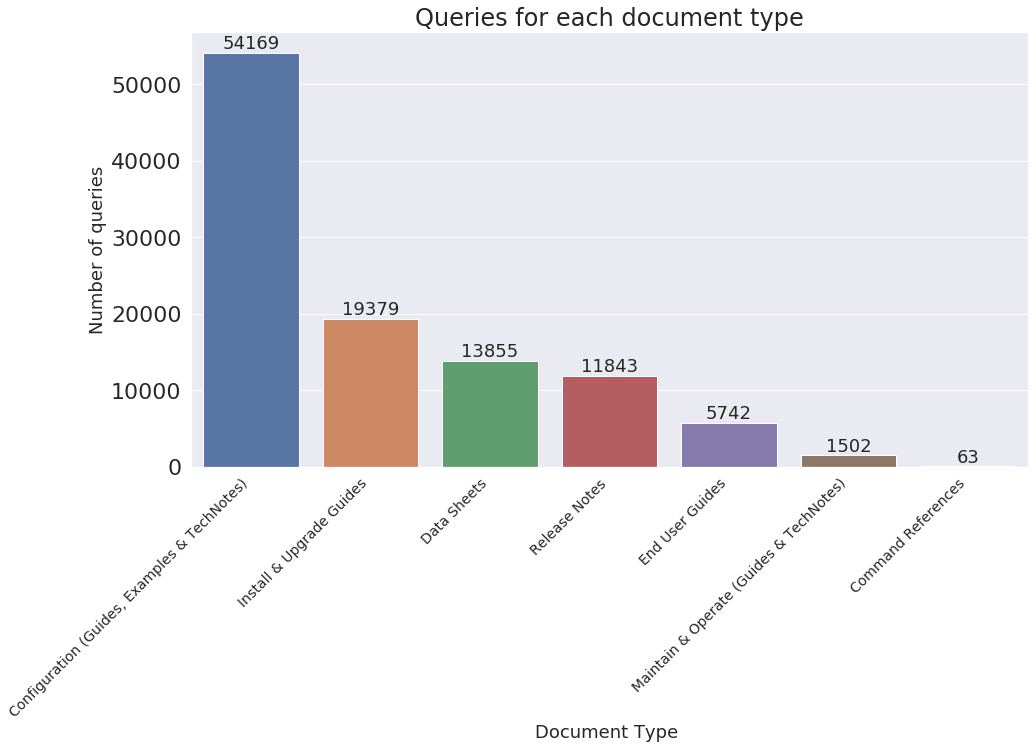

In [77]:
# Concat dataframes.
concat_df = pd.concat([original_df,new_df], ignore_index=True)

# Print details.
print('Number of training queries: {}\n'.format(concat_df.shape[0]))
print('Number of doc types: {:,}'.format(len(concat_df.Class.unique())))
for i, cat in enumerate(concat_df.Class.unique()):
    print("  {}".format(cat))

# Plot repartition.
plot_repartition(concat_df)

### Get balanced dataset

Number of training queries: 9905

Number of doc types: 5
  Configuration (Guides, Examples & TechNotes)
  Install & Upgrade Guides
  Data Sheets
  Release Notes
  End User Guides


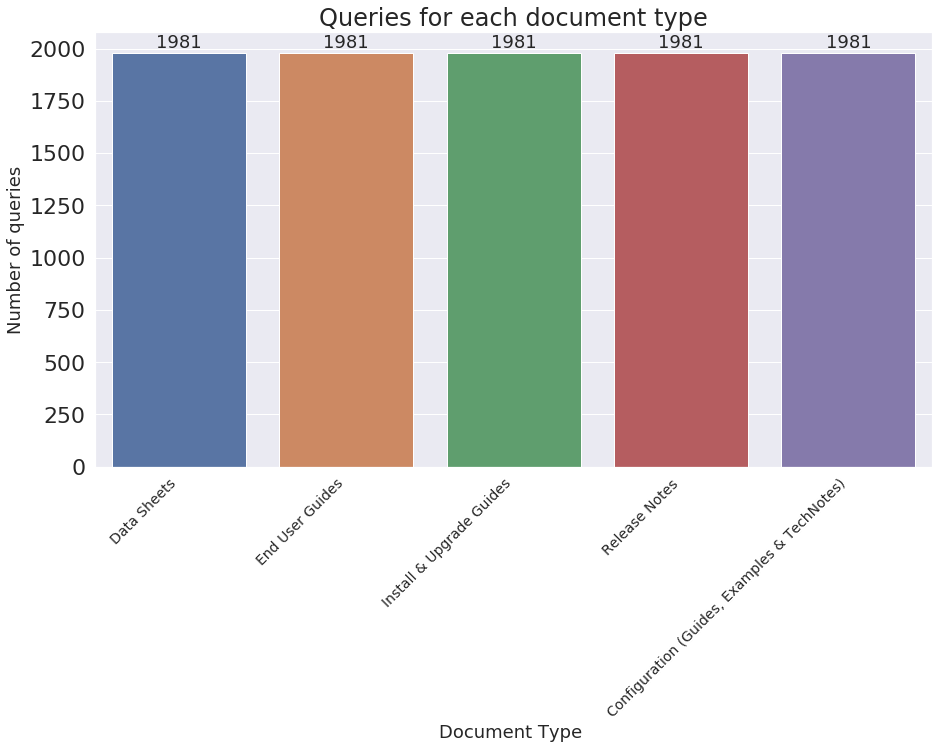

In [104]:
# Get the maximum number of samples of the smaller class. 
# Note that the classes with under 1500 samples are not taken into account.
count = original_df['Class'].value_counts()
count = count[count > 1500]
nb_samples = min(count)

# Randomly select 'nb_samples' for all classes.
balanced_df = pd.DataFrame(columns=['Query', 'Class'])
for i, cat in enumerate(count.index.tolist()):
    tmp_df = original_df[original_df['Class']==cat].sample(n=nb_samples, replace=False, random_state=2)
    balanced_df = pd.concat([balanced_df,tmp_df], ignore_index=True)

# Print details.
print('Number of training queries: {}\n'.format(balanced_df.shape[0]))
print('Number of doc types: {:,}'.format(len(balanced_df.Class.unique())))
for i, cat in enumerate(balanced_df.Class.unique()):
    print("  {}".format(cat))

# Plot repartition.
plot_repartition(balanced_df)

## Wordclouds

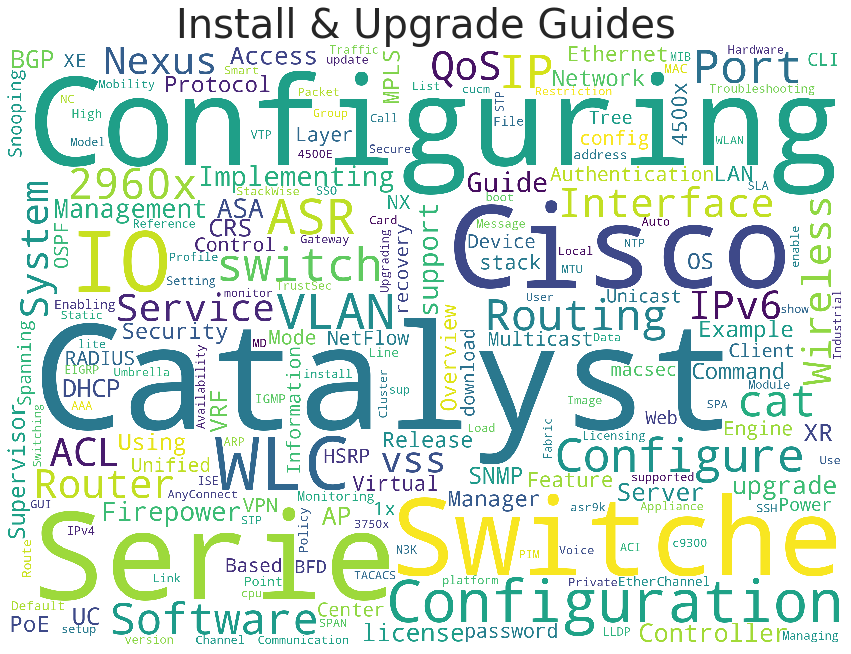

In [79]:
# Get all queries from 'Install & Upgrade Guides'
subset = original_df[original_df.Class=='Configuration (Guides, Examples & TechNotes)']
text = subset.Query.values

# Create Wordcloud.
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  collocations=False,
                  width=2500,
                  height=1800
                  ).generate(" ".join(text))
# Plot.
plt.figure(figsize=(15,15))
plt.axis('off')
plt.title("Install & Upgrade Guides", fontsize=40)
plt.imshow(cloud)

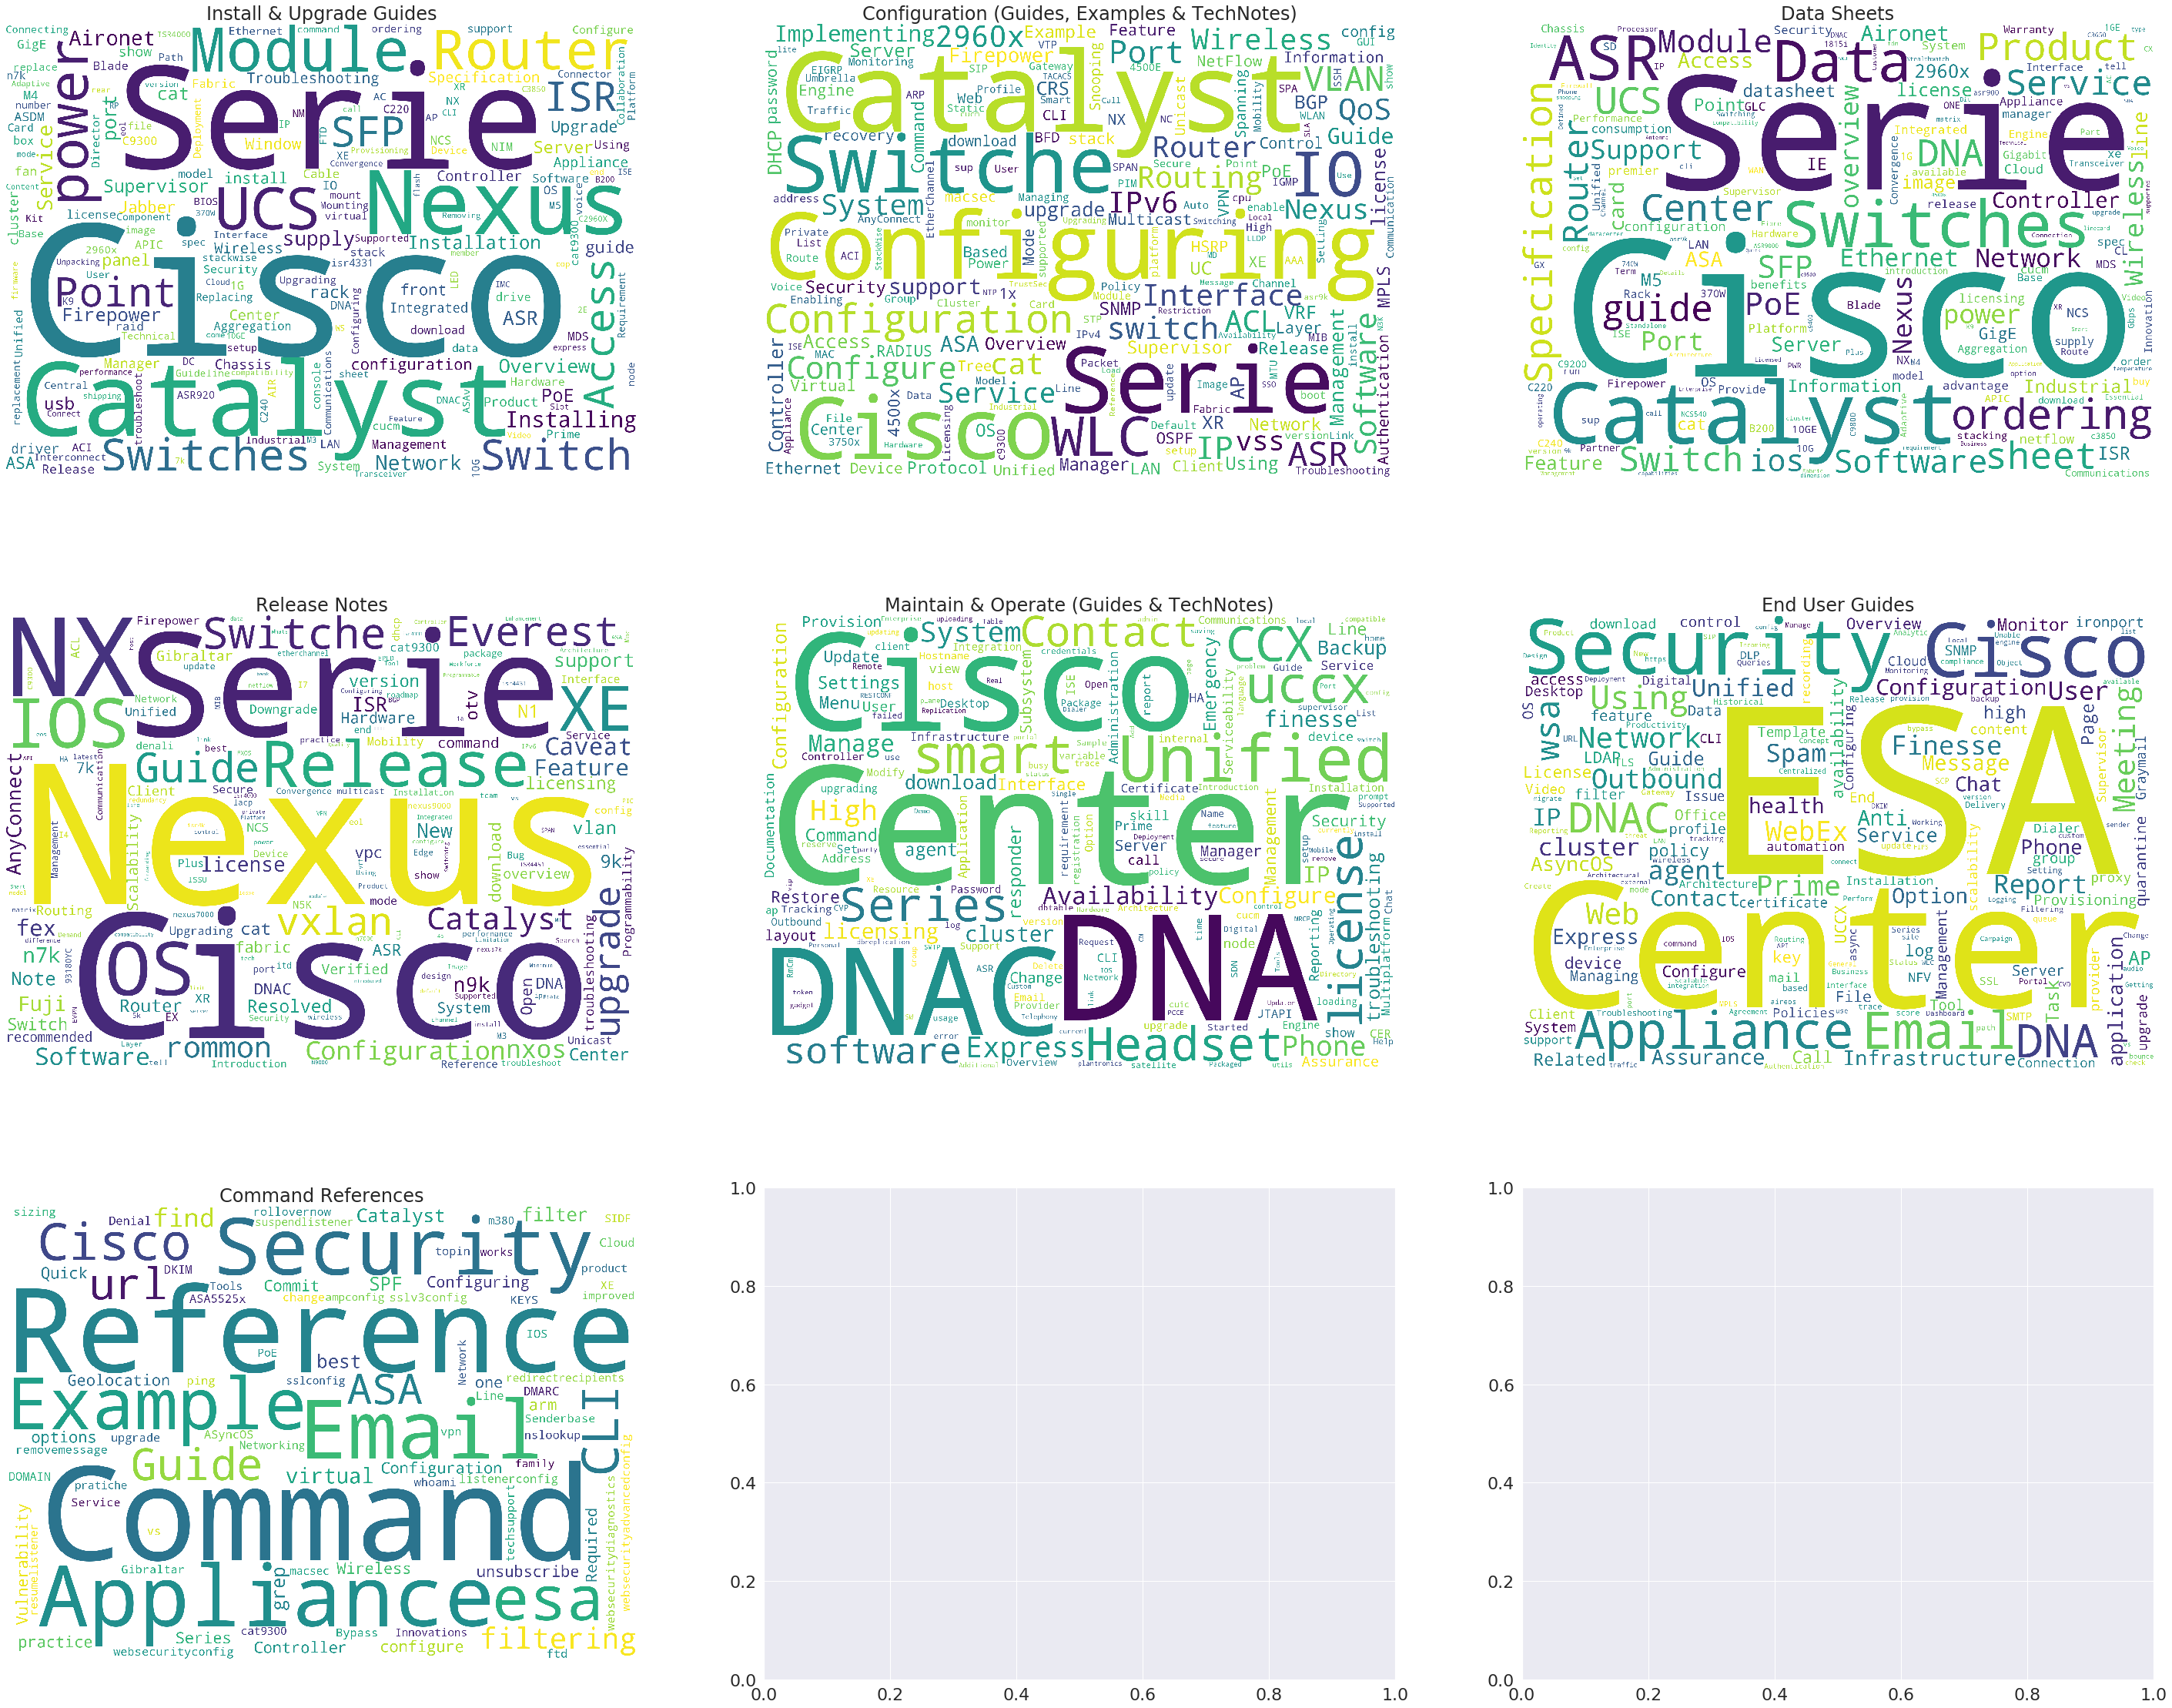

In [81]:
# Init figure.
height = 3
width = 3
fig, axarr = plt.subplots(height, width, figsize=(50,40))


# Draw plots.
for i, cat in enumerate(original_df.Class.unique()):
    
    # Get all queries from the category
    subset = original_df[original_df.Class==cat]
    text = subset.Query.values
    
    # Create Wordcloud.
    cloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      collocations=False,
                      width=2500,
                      height=1800
                      ).generate(" ".join(text))
    
    # Add subplot.
    if i%width==0:
        idx = i+1
    else:
        idx = i
    axarr[int(np.ceil(idx/width))-1, i%width].imshow(cloud)
    axarr[int(np.ceil(idx/width))-1, i%width].set_title(cat)
    axarr[int(np.ceil(idx/width))-1, i%width].axis('off')
    
plt.show()